C:\Users\Ricardo\AppData\Local\Temp\ipykernel_7124\652312768.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bosque_data, x='Faixa Horária', y='Tempototal', ax=axes[0, 0], palette=['green', 'green'], order=['Manhã (04:00-06:00)', 'Tarde (14:00-17:00)'], showfliers=False)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_7124\652312768.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Manhã', 'Tarde'], fontsize=15, weight='bold')
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_7124\652312768.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agua_data, x='Faixa Horá

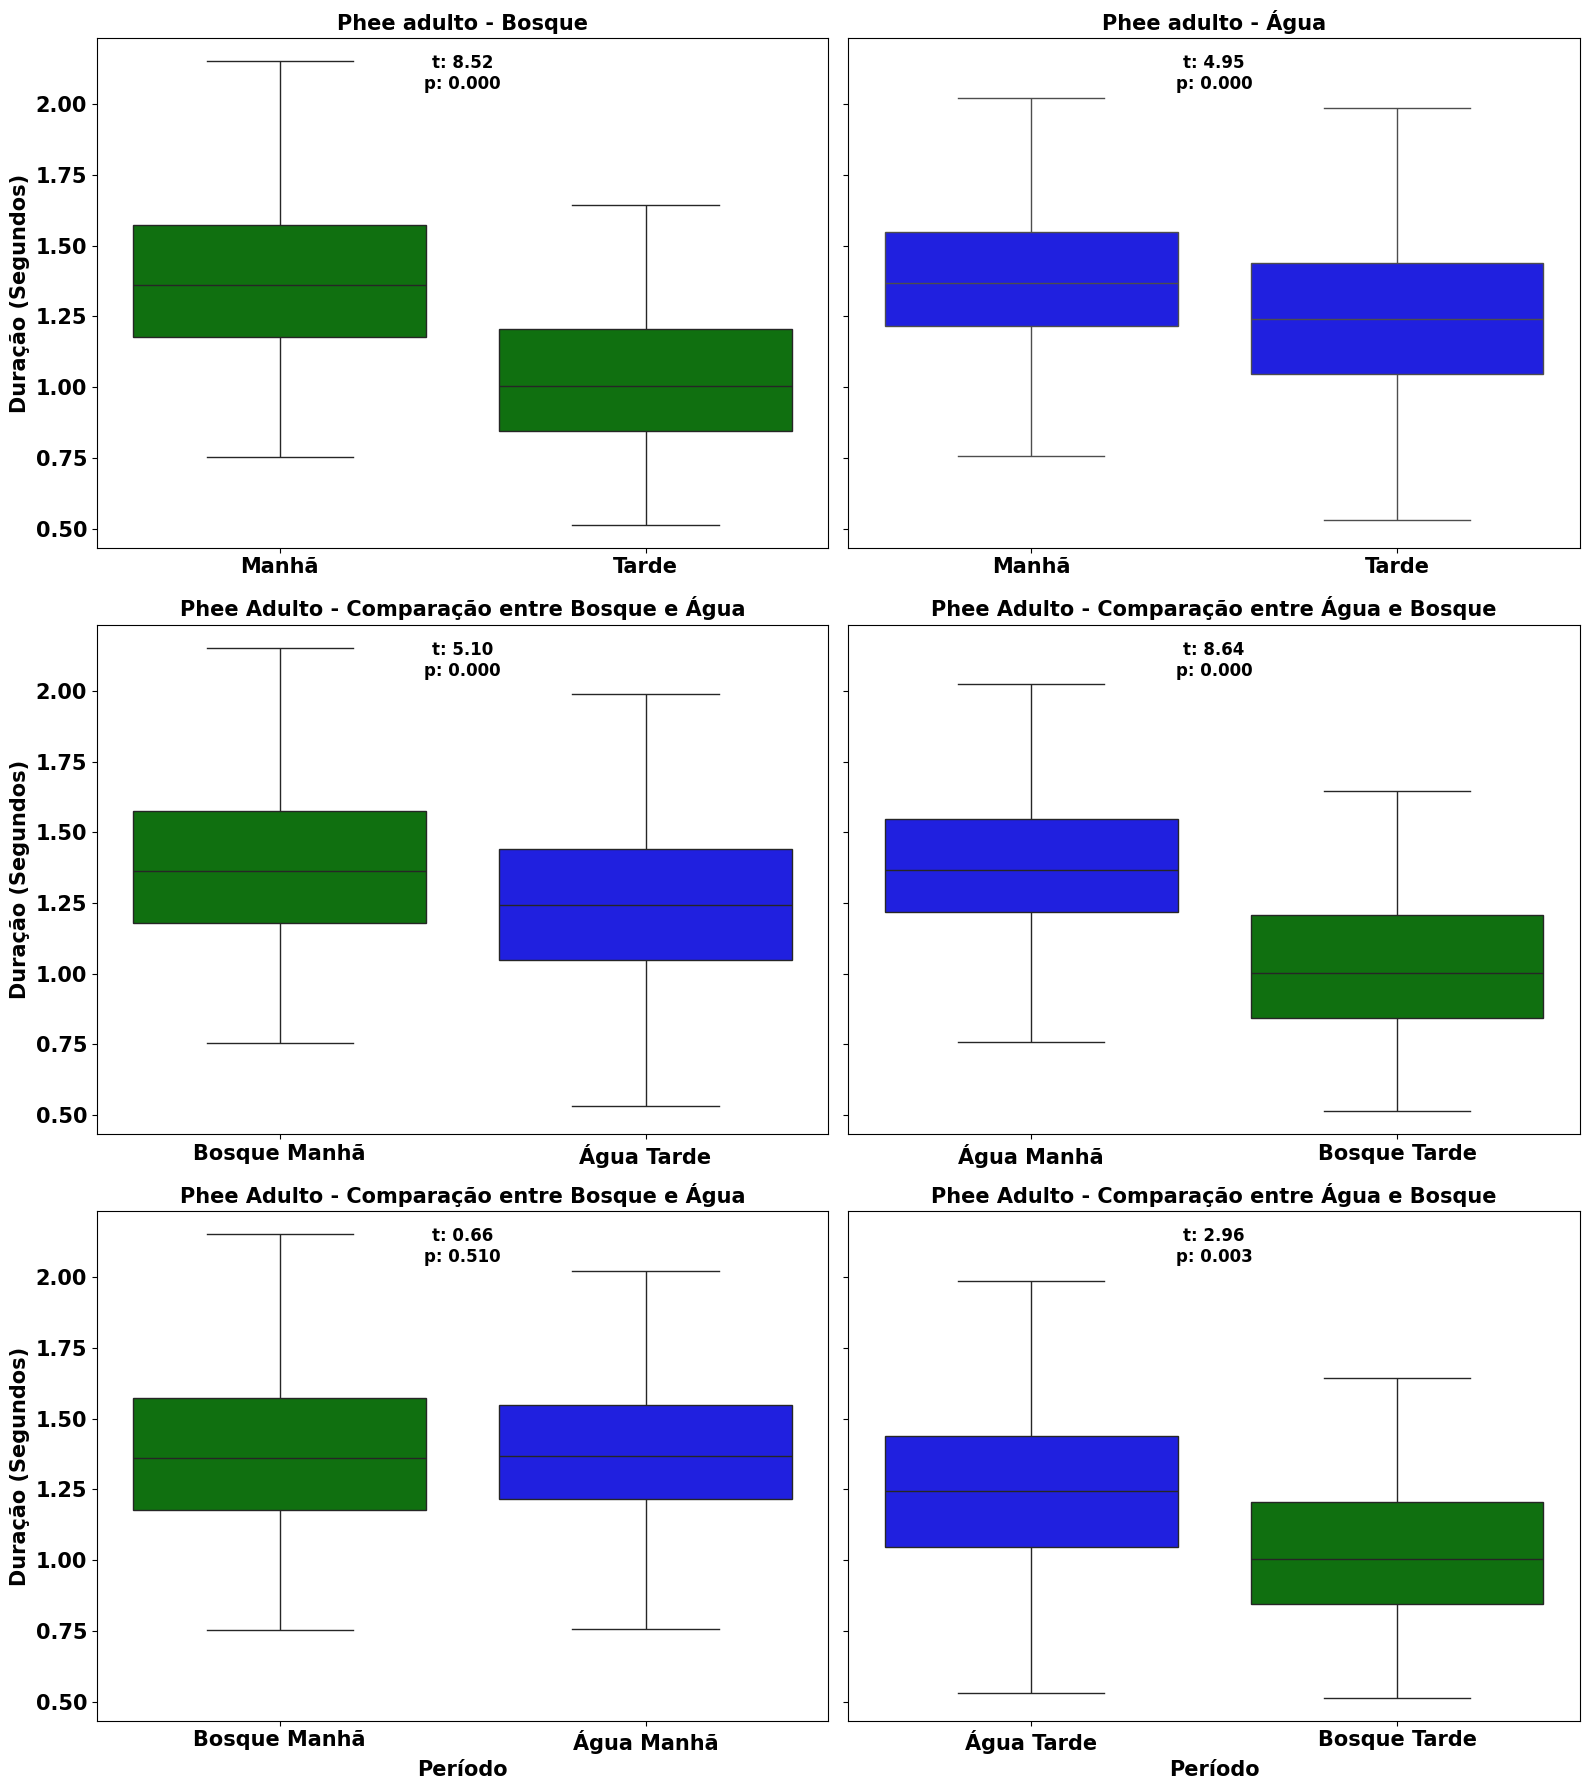

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Caminho para os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Listas de abas para cada tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Carregando DataFrames de cada aba da tabela Água e Bosque
df_agua = [pd.read_excel(excel_file1, sheet_name=aba).assign(Tabela='Água') for aba in abas_agua]
df_bosque = [pd.read_excel(excel_file2, sheet_name=aba).assign(Tabela='Bosque') for aba in abas_bosque]

# Concatenando os DataFrames
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna Data para o formato de data e a coluna Hora para o formato de hora
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')
combined_df['Hora'] = pd.to_datetime(combined_df['Hora'], format='%H:%M:%S')

# Definindo faixas horárias e filtrando os dados
horario_manha = (4, 6)  # das 4:00 às 6:00
horario_tarde = (14, 17)  # das 14:00 às 17:00

# Função para categorizar faixas horárias
def faixa_horaria(hora):
    if horario_manha[0] <= hora < horario_manha[1]:
        return 'Manhã (04:00-06:00)'
    elif horario_tarde[0] <= hora < horario_tarde[1]:
        return 'Tarde (14:00-17:00)'
    else:
        return None

# Aplicando a função para criar a coluna 'Faixa Horária'
combined_df['Faixa Horária'] = combined_df['Hora'].dt.hour.apply(faixa_horaria)
combined_df = combined_df.dropna(subset=['Faixa Horária'])

# Filtrando para a vocalização 'phee adulto'
combined_df = combined_df[combined_df['Classificacao'] == 'phee adulto']

# Separando os dados por grupo para os testes estatísticos
agua_data = combined_df[combined_df['Tabela'] == 'Água']
bosque_data = combined_df[combined_df['Tabela'] == 'Bosque']

# Configuração da figura com três linhas e duas colunas de subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=True)

# Comparação Bosque manhã vs Bosque tarde
t_statistic, p_value = ttest_ind(
    bosque_data[bosque_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal'],
    bosque_data[bosque_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal']
)
sns.boxplot(data=bosque_data, x='Faixa Horária', y='Tempototal', ax=axes[0, 0], palette=['green', 'green'], order=['Manhã (04:00-06:00)', 'Tarde (14:00-17:00)'], showfliers=False)
axes[0, 0].set_title("Phee adulto - Bosque", weight='bold', fontsize=15)
axes[0, 0].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[0, 0].set_xticklabels(['Manhã', 'Tarde'], fontsize=15, weight='bold')
axes[0, 0].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
axes[0, 0].set_xlabel('',weight='bold', fontsize=15)
plt.setp(axes[0, 0].get_yticklabels(), fontsize=15, weight='bold')

# Comparação Água manhã vs Água tarde
t_statistic, p_value = ttest_ind(
    agua_data[agua_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal'],
    agua_data[agua_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal']
)
sns.boxplot(data=agua_data, x='Faixa Horária', y='Tempototal', ax=axes[0, 1], palette=['blue', 'blue'], order=['Manhã (04:00-06:00)', 'Tarde (14:00-17:00)'], showfliers=False)
axes[0, 1].set_title("Phee adulto - Água", fontsize=15, weight='bold')
axes[0, 1].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[0, 1].set_xticklabels(['Manhã', 'Tarde'], fontsize=15, weight='bold')
axes[0, 1].set_xlabel('',weight='bold', fontsize=15)

# Comparação Bosque manhã vs Água tarde
t_statistic, p_value = ttest_ind(
    bosque_data[bosque_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal'],
    agua_data[agua_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal']
)
sns.boxplot(data=pd.concat([bosque_data[bosque_data['Faixa Horária'] == 'Manhã (04:00-06:00)'], agua_data[agua_data['Faixa Horária'] == 'Tarde (14:00-17:00)']]), 
            x='Tabela', y='Tempototal', ax=axes[1, 0], palette=['green', 'blue'], showfliers=False)
axes[1, 0].set_title("Phee Adulto - Comparação entre Bosque e Água", fontsize=15, weight='bold')
axes[1, 0].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[1, 0].set_xticklabels(['Bosque Manhã', 'Água Tarde'], fontsize=15, weight='bold')
axes[1, 0].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
axes[1, 0].set_xlabel('',weight='bold', fontsize=15)
plt.setp(axes[1, 0].get_yticklabels(), fontsize=15, weight='bold')

# Comparação Água manhã vs Bosque tarde
t_statistic, p_value = ttest_ind(
    agua_data[agua_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal'],
    bosque_data[bosque_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal']
)
sns.boxplot(data=pd.concat([agua_data[agua_data['Faixa Horária'] == 'Manhã (04:00-06:00)'], bosque_data[bosque_data['Faixa Horária'] == 'Tarde (14:00-17:00)']]), 
            x='Tabela', y='Tempototal', ax=axes[1, 1], palette=['blue', 'green'], showfliers=False)
axes[1, 1].set_title("Phee Adulto - Comparação entre Água e Bosque", fontsize=15, weight='bold')
axes[1, 1].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[1, 1].set_xticklabels(['Água Manhã', 'Bosque Tarde'],  fontsize=15, weight='bold')
axes[1, 1].set_xlabel('',weight='bold', fontsize=15)

# Comparação Bosque manhã vs Água manhã
t_statistic, p_value = ttest_ind(
    bosque_data[bosque_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal'],
    agua_data[agua_data['Faixa Horária'] == 'Manhã (04:00-06:00)']['Tempototal']
)
sns.boxplot(data=pd.concat([bosque_data[bosque_data['Faixa Horária'] == 'Manhã (04:00-06:00)'], agua_data[agua_data['Faixa Horária'] == 'Manhã (04:00-06:00)']]), 
            x='Tabela', y='Tempototal', ax=axes[2, 0], palette=['green', 'blue'], showfliers=False)
axes[2, 0].set_title("Phee Adulto - Comparação entre Bosque e Água", fontsize=15, weight='bold')
axes[2, 0].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[2, 0].set_xticklabels(['Bosque Manhã', 'Água Manhã'],  fontsize=15, weight='bold')
axes[2, 0].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
axes[2, 0].set_xlabel('Período',weight='bold', fontsize=15)
plt.setp(axes[2, 0].get_yticklabels(), fontsize=15, weight='bold')
# Comparação Água tarde vs Bosque tarde
t_statistic, p_value = ttest_ind(
    agua_data[agua_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal'],
    bosque_data[bosque_data['Faixa Horária'] == 'Tarde (14:00-17:00)']['Tempototal']
)
sns.boxplot(data=pd.concat([agua_data[agua_data['Faixa Horária'] == 'Tarde (14:00-17:00)'], bosque_data[bosque_data['Faixa Horária'] == 'Tarde (14:00-17:00)']]), 
            x='Tabela', y='Tempototal', ax=axes[2, 1], palette=['blue', 'green'], showfliers=False)
axes[2, 1].set_title("Phee Adulto - Comparação entre Água e Bosque", fontsize=15, weight='bold')
axes[2, 1].annotate(f't: {t_statistic:.2f}\np: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, weight='bold')
axes[2, 1].set_xticklabels(['Água Tarde', 'Bosque Tarde'],  fontsize=15, weight='bold')
axes[2, 1].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
axes[2, 1].set_xlabel('Período',weight='bold', fontsize=15)

# Configurando layout
plt.tight_layout()
plt.show()
